# Credit Card Fraud Detection Analysis

#### Dataset: Credit Card Transactions Fraud Detection Datas by Kartik Shenoy
#### Dataset Link: https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset

#### By: Tyler Lee

##### *Note: The dataset used in this project was generated using Sparkov Data Generation created by Brandon Harris, hence the data showcased below were not the actual real-life sensitive data but a simulation of one that mimics the real-life scenario.*

## Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, r2_score, jaccard_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

## Loading data and performing Data Pre-processing

In [2]:
# Load datasets
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

# Dropping Unnecessary Column
train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

# Display information about the datasets
print("Training Data Info:")
print(train_df.info())

print("\nTesting Data Info:")
print(test_df.info())

# Checking for missing values within the datasets
print("Missing Values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_df.isnull().sum())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14

## Data Overview

In [3]:
# Displaying 5 rows from Training Data
train_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Displaying 5 rows from Test Data
test_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# Displaying the Total amount of Fraud and non-Fraudulent transactions for Training Dataset
print(train_df['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [6]:
# Displaying the Total amount of Fraud and non-Fraudulent transactions for Test Dataset
print(test_df['is_fraud'].value_counts())

is_fraud
0    553574
1      2145
Name: count, dtype: int64


___

## Exploratory Data Analysis

#### 1. Target Variable Distribution

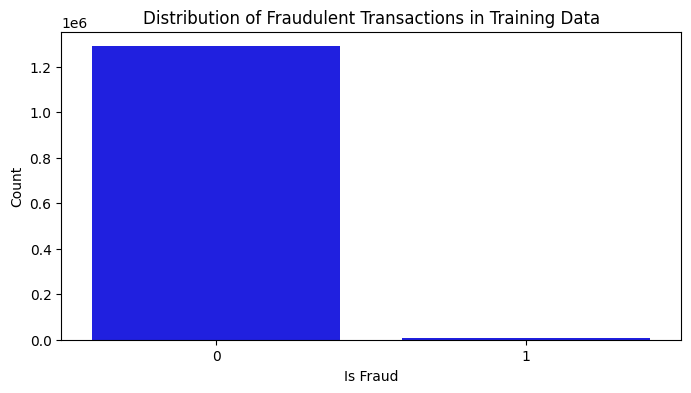

In [7]:
# The distribution of target variable: 'is_fraud'
plt.figure(figsize=(8, 4))
sns.countplot(x='is_fraud', data=train_df, color='blue')
plt.title('Distribution of Fraudulent Transactions in Training Data')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

Insight: Fraudulent transactions are significantly fewer than non-fraudulent ones, indicating class imbalance in the data.

#### 2. Transaction Amount Distribution

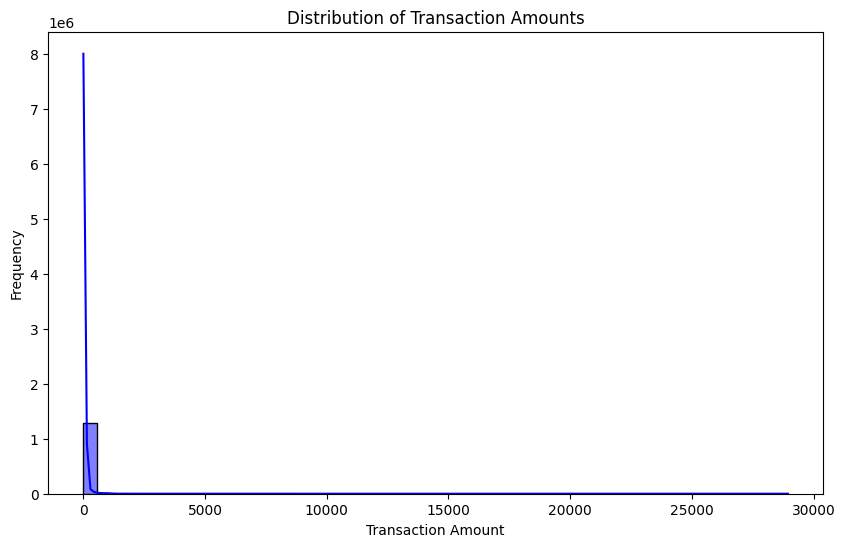

In [8]:
# The distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(train_df['amt'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Insight: Most transactions were small amounts, with fewer large transactions. Such a skewness could potentially impact model performance.

#### 3. Correlation Analysis

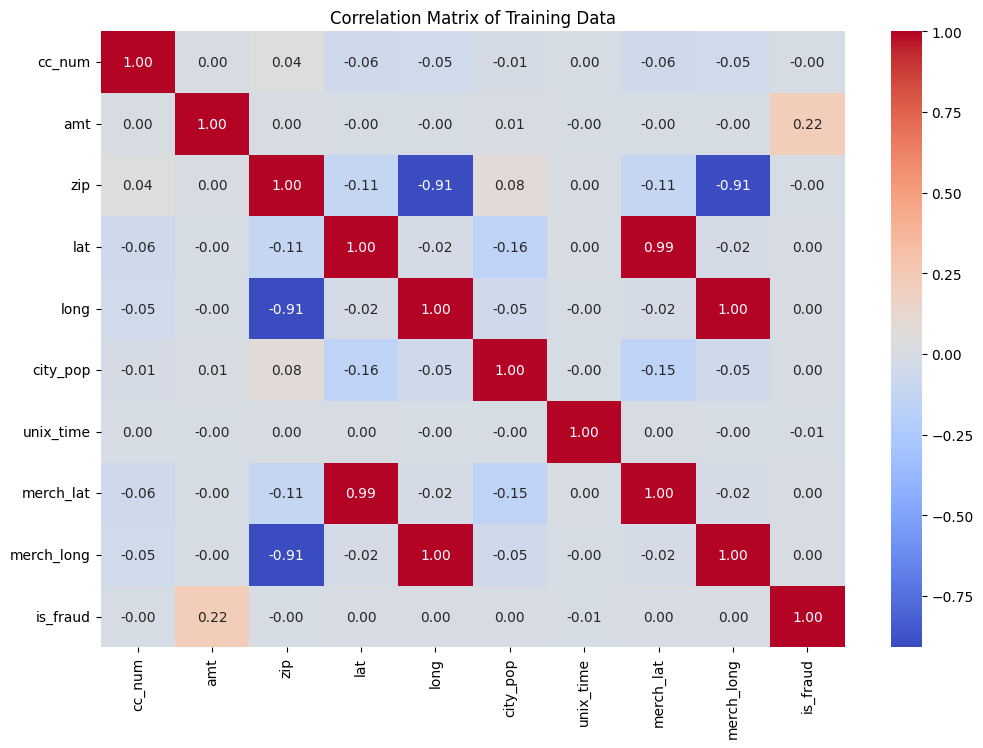

In [9]:
# Correlation matrix (numeric columns)
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
correlation_matrix = train_df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Training Data')
plt.show()

Insight: Features like 'scaled_amt' may have stronger correlations with the target variable 'is_fraud' as compared to other features.

#### 4. Fraud Transactions by Category

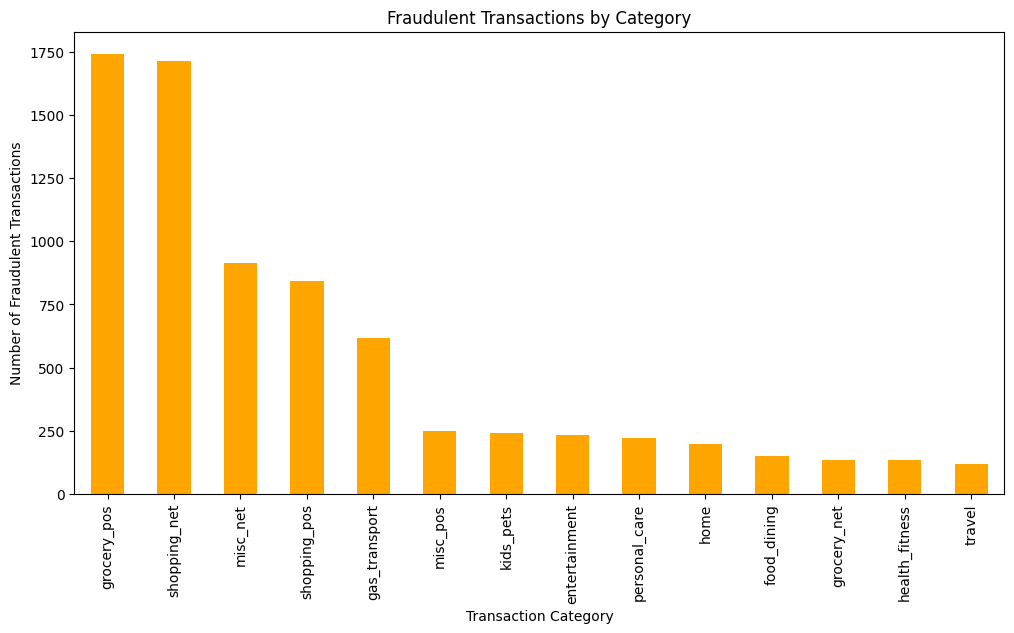

In [10]:
# Fraudulent transactions based on transaction category
fraud_by_category = train_df[train_df['is_fraud'] == 1].groupby('category')['is_fraud'].count()
fraud_by_category = fraud_by_category.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
fraud_by_category.plot(kind='bar', color='orange')
plt.title('Fraudulent Transactions by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

Insight: Categories such as 'grocery_pos' and 'shopping_pos' have a higher incidence of fraud, highlighting potential vulnerabilities.

___

## Feature Engineering

#### 1. Creating new features 

In [11]:
# Transaction hour
train_df['hour'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
test_df['hour'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.hour

# Transaction day of the week
train_df['day_of_week'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.dayofweek
test_df['day_of_week'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.dayofweek

#### 2. Scaling Transaction Amount

In [12]:
scaler = StandardScaler()
train_df['scaled_amt'] = scaler.fit_transform(train_df[['amt']])
test_df['scaled_amt'] = scaler.transform(test_df[['amt']])

##### Insight: The new features 'hour', 'day_of_week', and 'scaled_amt' would provide normalized and temporal dimensions that may potentially improve model predictions.

___

## Dealing with Class Imbalance

#### 1. Applying SMOTE to Balance the Classes

In [13]:
# Features and target variable
X = train_df[['scaled_amt', 'hour', 'day_of_week']]
y = train_df['is_fraud']

# Applying SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after applying SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution after applying SMOTE:
is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


___

## Model Selection and Evaluation

#### Train Test split the training data and Building Models


Evaluating Random Forest...
Accuracy: 0.9466
F1 Score: 0.9463
R2 Score: 0.7863
Jaccard Index: 0.8980


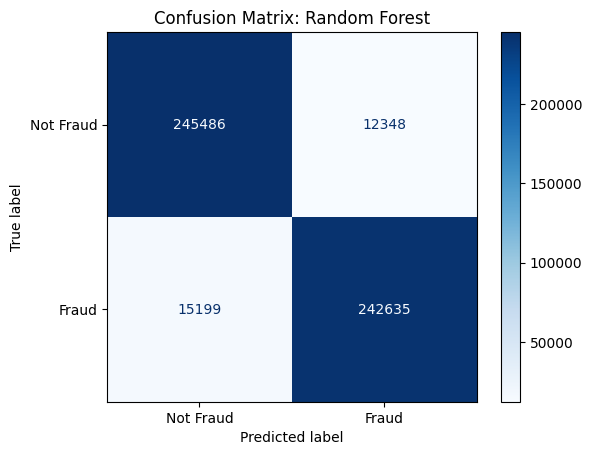


Evaluating Logistic Regression...
Accuracy: 0.8537
F1 Score: 0.8380
R2 Score: 0.4149
Jaccard Index: 0.7211


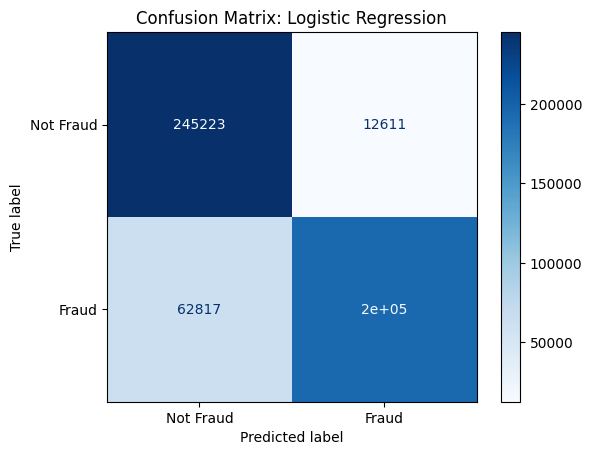


Evaluating Decision Tree...
Accuracy: 0.9490
F1 Score: 0.9487
R2 Score: 0.7958
Jaccard Index: 0.9024


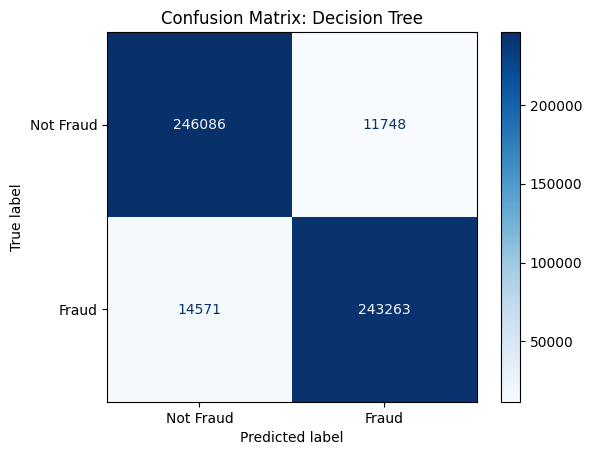


Evaluating XGBoost...
Accuracy: 0.9498
F1 Score: 0.9500
R2 Score: 0.7991
Jaccard Index: 0.9047


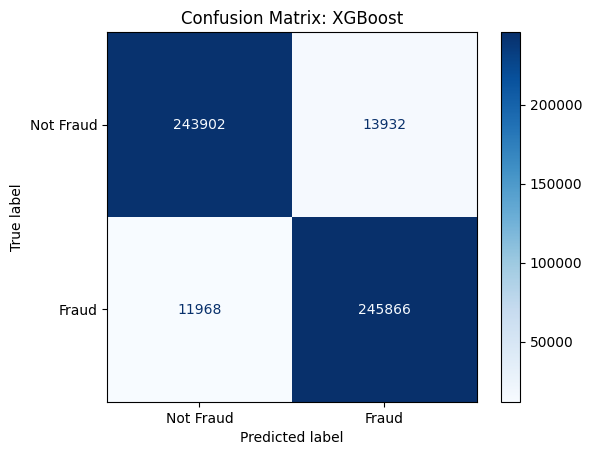


Best Model: XGBoost


In [14]:
# Splitting the resampled data into training and testing datasets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Building Models

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

best_model = None
best_score = 0

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    jaccard = jaccard_score(y_val, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Jaccard Index: {jaccard:.4f}")

    if f1 > best_score:
        best_score = f1
        best_model_name = model_name
        best_model = model

    # Confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Not Fraud", "Fraud"])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

print(f"\nBest Model: {best_model_name}")

### Hyperparameter Tuning of Models Using GridSearchCV

In [15]:
# Hyperparameter grids
rf_hyperparam_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

lr_hyperparam_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

dt_hyperparam_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_hyperparam_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#### Mapping hyperparameter grids to each models & Updating best model with tuned hyperparameters

In [16]:
# Mapping grids to each models
hyperparam_grids = {
    'Random Forest': rf_hyperparam_grid,
    'Logistic Regression': lr_hyperparam_grid,
    'Decision Tree': dt_hyperparam_grid,
    'XGBoost': xgb_hyperparam_grid
}

if best_model_name in hyperparam_grids:
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=hyperparam_grids[best_model_name],
        scoring='f1',
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Updating the best model with tuned hyperparameters
    best_model = grid_search.best_estimator_
    print("\nBest Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


### Evaluation of Best Model with Classification Report

In [17]:
# Evaluate the tuned model on the validation set
print("\nClassification Report for Tuned-Best Model:")
y_pred_tuned = best_model.predict(X_val)
print(classification_report(y_val, y_pred_tuned))


Classification Report for Tuned-Best Model:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95    257834
           1       0.95      0.96      0.96    257834

    accuracy                           0.96    515668
   macro avg       0.96      0.96      0.96    515668
weighted avg       0.96      0.96      0.96    515668



Insight: The tuned model demonstrates improved performance, highlighting the importance of addressing class imbalance and optimizing hyperparameters for fraud detection.

___

### Test Set Evaluation (Untuned Model)


Test Set Evaluation Metrics:
Accuracy: 0.9489
F1 Score: 0.1165
Jaccard Index: 0.0618

Classification Report on Test set:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.87      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.91      0.55    555719
weighted avg       1.00      0.95      0.97    555719



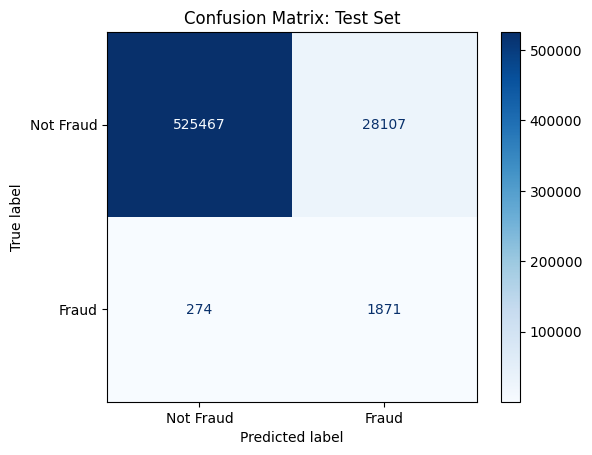

In [18]:
## Test Set Evaluation

# Prepare test features and target variable
X_test = test_df[['scaled_amt', 'hour', 'day_of_week']]
y_test = test_df['is_fraud']

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_jaccard = jaccard_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {test_acc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Jaccard Index: {test_jaccard:.4f}")

# Evaluate performance using the new predictions
print("\nClassification Report on Test set:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
disp = ConfusionMatrixDisplay(test_conf_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Test Set')
plt.show()

Insight: The model has demostrated a high accuracy of fraud prediction on the Test Dataset. However, the F1 score has indicated a lower precision and recall rate of the current model.

*The model has showcased a higher value of False Negative prediction than False Positive, this indicates that more fraudulent transaction were predicted as non-fraudulent than non-fraudulent transaction predicted as fraud. This does not align with the initial goal of preventing financial risk.* 

___

### Tuning Model for the betterment of Financial Risk (Tuned Model)

Optimal Threshold: 0.9912
Best F1 Score: 0.5227


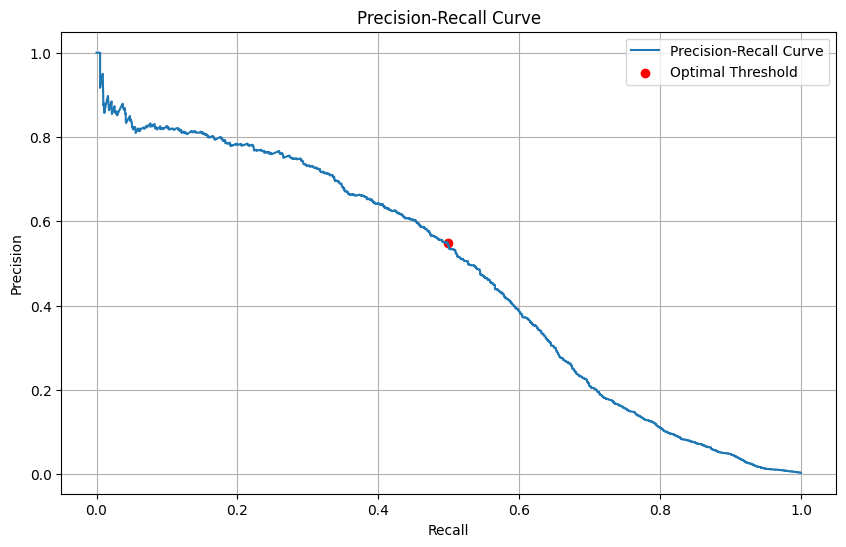


Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.55      0.50      0.52      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.75      0.76    555719
weighted avg       1.00      1.00      1.00    555719



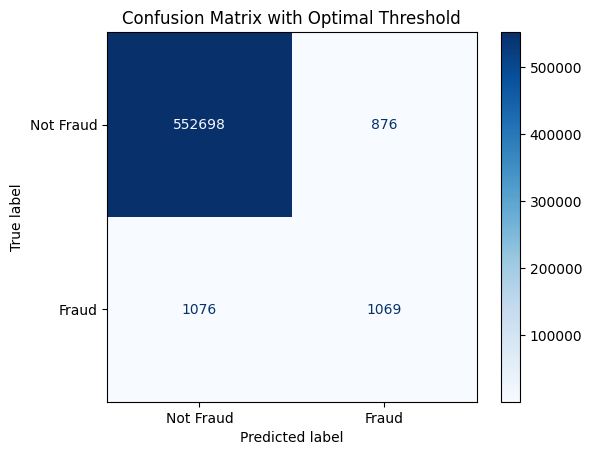

In [19]:
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Best F1 Score: {f1_scores[optimal_idx]:.4f}")

# Visualize the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label='Optimal Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

# Apply the optimal threshold to make new predictions
y_test_pred = (y_test_proba >= optimal_threshold).astype(int)

# Evaluate performance using the new predictions
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix with Optimal Threshold')
plt.show()

___

### Conclusion

The choice between Untuned Model (Model 1) and Tuned Model (Model 2) would depend on the business priorities and the trade-offs that are willing to be accepted.

If the primary goal is to detect as much fraud as possible to minimize financial losses, Model 1 would be a better choice. With a recall ratio of 87%, it successfully identifies most fraud cases (1,871 out of 2,145). However, this comes at the cost of precision, resulting in many false positives (28,107 legitimate transactions flagged as fraud). While operationally challenging, this approach ensures fewer fraudulent transactions go undetected, which is critical in high-risk systems.

On the other hand, if balancing fraud detection with operational efficiency is the priority, Model 2 would be more suitable. It offers a better balance between precision (55%) and recall (50%), achieving a higher F1 score of 0.52. This reduces the burden of false positives while still detecting a significant portion of fraud cases (1,069 out of 2,145). This model is ideal for systems where minimizing disruptions to legitimate users is essential.

Ultimately, the decision should align with the business priorities and its emphasis on reducing financial risks from undetected fraud.